# Insights from Electoral Bond Dataset: Trends and Distribution

This analysis explores trends and distribution in electoral bond purchases, focusing on contributions received by political parties. It examines total denomination amounts over time, reveals distribution patterns, and highlights contributions by political parties. The goal is to provide insights into the dynamics of political financing.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [28]:
pd.options.display.float_format = '{:.2f}'.format

In [29]:
df = pd.read_csv(r"C:\Users\sarwat\Electoral_Bond\Electoral_bonds.csv")

In [30]:
df.head(10)

,Date of\nEncashment,Name of the Political Party,Denomination,Unnamed: 3
0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000,NaN
3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
5,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
6,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
7,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
8,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
9,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN


### Droping unwanted column 

In [31]:
df1 = df
df1.rename(columns = {'Date of\nEncashment' : 'Date of Encashment'} , inplace = True)

In [32]:
df1

,Date of Encashment,Name of the Political Party,Denomination,Unnamed: 3
0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000,NaN
3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,NaN
...,...,...,...,...
20416,24/Jan/2024,JANASENA PARTY,1000000,NaN
20417,24/Jan/2024,JANASENA PARTY,1000000,NaN
20418,24/Jan/2024,JANASENA PARTY,1000000,NaN
20419,24/Jan/2024,JANASENA PARTY,1000000,NaN


In [33]:
# Drop the column named 'Unnamed: 3'
df1 = df.drop(columns=['Unnamed: 3'])

# Display the first few rows of the DataFrame to verify the column has been dropped
df1.head()

,Date of Encashment,Name of the Political Party,Denomination
0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000
3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000


## Understand the structure and content of dataset


In [34]:
# Check the shape of the DataFrame (number of rows and columns)
print(df1.shape)

(20421, 3)


In [35]:
# Check the data types of each column
print(df1.dtypes)

Date of Encashment             object
Name of the Political Party    object
Denomination                    int64
dtype: object


In [36]:
# Check for missing values
print(df1.isnull().sum())

Date of Encashment             0
Name of the Political Party    0
Denomination                   0
dtype: int64


In [37]:
# Get summary statistics
df1.describe()

,Denomination
count,20421.00
mean,6252920.67
std,4576321.21
min,1000.00
25%,1000000.00
50%,10000000.00
75%,10000000.00
max,10000000.00


## Converting into date and Extracting year 


In [38]:
# Convert 'Date of Encashment' column to datetime format
df1['Date of Encashment'] = pd.to_datetime(df1['Date of Encashment'])

# Extract year 'from Date of Encashment' column
df1['Year'] = df1['Date of Encashment'].dt.year

# Display the first few rows of the DataFrame with the new 'Year' column
df1[['Date of Encashment', 'Year']].head()


,Date of Encashment,Year
0,2019-04-12,2019
1,2019-04-12,2019
2,2019-04-12,2019
3,2019-04-12,2019
4,2019-04-12,2019


## Extracting Month  

In [39]:
# Convert 'Date of Encashment' column to datetime format
df1['Date of Encashment'] = pd.to_datetime(df1['Date of Encashment'])

# Extract month name
df1['Month'] = df1['Date of Encashment'].dt.strftime('%B')

# Display the first few rows to verify the changes
print(df1[['Date of Encashment', 'Month']].head())


  Date of Encashment  Month
0         2019-04-12  April
1         2019-04-12  April
2         2019-04-12  April
3         2019-04-12  April
4         2019-04-12  April


## Adding two column named Denomination in crore and lakhs  

In [40]:
# Add a new column for 'Denomination (Crore)'
df1['Denomination(Crore)'] = df1['Denomination'] / 10000000
df1['Denomination(Lakhs)'] = df1['Denomination'] / 100000

In [41]:
df1

,Date of Encashment,Name of the Political Party,Denomination,Year,Month,Denomination(Crore),Denomination(Lakhs)
0,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019,April,0.10,10.00
1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019,April,0.10,10.00
2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000,2019,April,1.00,100.00
3,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019,April,0.10,10.00
4,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000,2019,April,0.10,10.00
...,...,...,...,...,...,...,...
20416,2024-01-24,JANASENA PARTY,1000000,2024,January,0.10,10.00
20417,2024-01-24,JANASENA PARTY,1000000,2024,January,0.10,10.00
20418,2024-01-24,JANASENA PARTY,1000000,2024,January,0.10,10.00
20419,2024-01-24,JANASENA PARTY,1000000,2024,January,0.10,10.00


## Extracting acronym from party names

In [42]:
# Extracting acronym from party names
df1['Party_Acronym'] = df['Name of the Political Party'].apply(lambda x: ''.join(word[0] for word in x.split()).upper())

# Displaying the first few rows to verify the changes
print(df1[['Name of the Political Party', 'Party_Acronym']].head())


                Name of the Political Party Party_Acronym
0  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM        AIADMK
1  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM        AIADMK
2  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM        AIADMK
3  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM        AIADMK
4  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM        AIADMK


## Total Amount Recived

In [43]:
total_amount = df1['Denomination(Crore)'].sum().round(2)
print(total_amount)

12769.09


## The total denomination amount received in each year

In [44]:
# Group by year and calculate total denomination amount
denomination_by_year = df1.groupby(df1['Year'])['Denomination(Crore)'].sum()

# Display the total denomination amount received in each year
denomination_by_year

Year
2019   2385.09
2020    363.96
2021   1502.26
2022   3701.46
2023   4246.27
2024    570.05
Name: Denomination(Crore), dtype: float64

In [45]:
# Group by 'Year' and sum the 'Denomination' column
investment_sum = df1.groupby('Year')['Denomination'].sum().reset_index(name='Total Purchase')

# Convert 'Total Investment' to lakhs
investment_sum['Total Purchase (Lakhs)'] = investment_sum['Total Purchase'] / 100000

# Convert 'Total Investment' to crores
investment_sum['Total Purchase (Crore)'] = investment_sum['Total Purchase'] / 10000000


investment_sum['Total Purchase (Crore)'] = investment_sum['Total Purchase (Crore)'].round(2)


# Convert 'Total Investment' to millions
# investment_sum['Total Investment (Millions)'] = investment_sum['Total Investment'] / 1000000



# Display the converted data
print(investment_sum)


   Year  Total Purchase  Total Purchase (Lakhs)  Total Purchase (Crore)
0  2019     23850886000               238508.86                 2385.09
1  2020      3639600000                36396.00                  363.96
2  2021     15022625000               150226.25                 1502.26
3  2022     37014569000               370145.69                 3701.46
4  2023     42462713000               424627.13                 4246.27
5  2024      5700500000                57005.00                  570.05


In [46]:
# Convert the series to a DataFrame
denomination_df = denomination_by_year.reset_index()
denomination_df.columns = ['Year', 'Total Denomination(Crore)']

# Display the DataFrame
denomination_df

,Year,Total Denomination(Crore)
0,2019,2385.09
1,2020,363.96
2,2021,1502.26
3,2022,3701.46
4,2023,4246.27
5,2024,570.05


## Visualization of the total denomination amount received each year

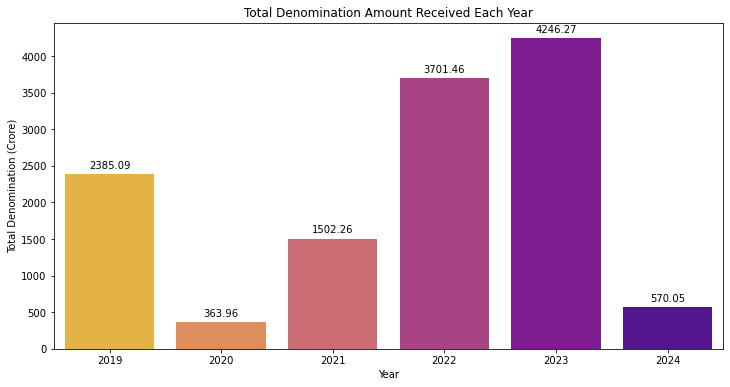

In [47]:
# Visualize the total denomination amount received each year
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Year', y='Total Denomination(Crore)', data=denomination_df, palette="plasma_r")
plt.xlabel('Year')
plt.ylabel('Total Denomination (Crore)')
plt.title('Total Denomination Amount Received Each Year')

# Annotate each bar with the total denomination amount
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


## Total Amount Received Each Month Over Multiple Years

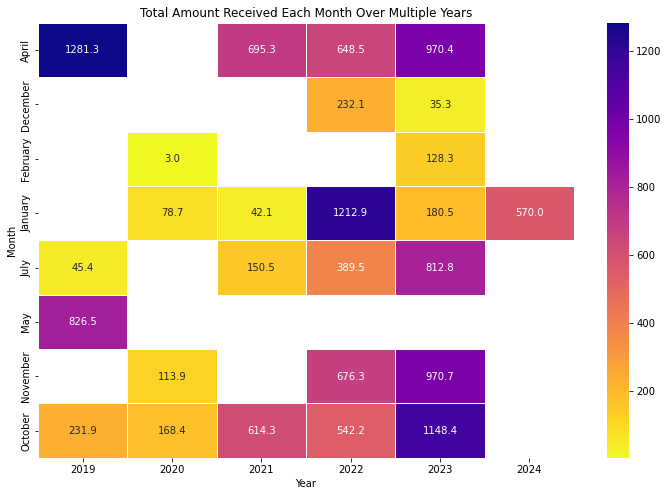

In [48]:
# Pivot the data to have 'Month' as the index, 'Year' as the columns, and 'Denomination(Crore)' as the values
pivot_table = df1.pivot_table(index='Month', columns='Year', values='Denomination(Crore)', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='plasma_r', annot=True, fmt='.1f', linewidths=0.5)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Total Amount Received Each Month Over Multiple Years')
plt.show()

## Monthly Trends in Amount Received

In [49]:
# Convert 'Date of Encashment' to datetime
df1['Date of Encashment'] = pd.to_datetime(df1['Date of Encashment'])

# Resample data to monthly frequency and sum the denominations
monthly_data = df1.resample('M', on='Date of Encashment')['Denomination(Crore)'].sum().reset_index()

# Create an interactive line plot using Plotly with 'plasma_r' theme and red line color
fig = px.line(monthly_data, x='Date of Encashment', y='Denomination(Crore)', title='Monthly Trends in Amount Received', color_discrete_sequence=['orange'], markers='markers')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Total Amount Received (Crore)')
fig.show()

## Total Amount Received Each Month Over Multiple Years

In [51]:
# Reset the index to ensure it's a RangeIndex
df1.reset_index(inplace=True)

# Extract the year and month from the 'Date of Encashment' column
df1['Year'] = df1['Date of Encashment'].dt.year
df1['Month'] = df1['Date of Encashment'].dt.month_name()

# Create a pivot table to aggregate the data by month and year
pivot_table = df1.pivot_table(index='Month', columns='Year', values='Denomination(Crore)', aggfunc='sum')

# Reshape the pivot table for Plotly scatter plot
scatter_df = pivot_table.stack().reset_index()
scatter_df.columns = ['Month', 'Year', 'Amount']

# Create an interactive scatter plot using Plotly
fig = px.scatter(scatter_df, x='Month', y='Amount', color='Year', title='Total Amount Received Each Month Over Multiple Years',
                 labels={'Amount': 'Total Amount Received (Crore)'}, hover_data={'Year': False, 'Month': False})

fig.show()


## The top 10 political parties 

In [52]:
# Group by 'Name of the Political Party' and calculate total denomination amount
party_denomination = df1.groupby(['Name of the Political Party','Party_Acronym'])['Denomination(Crore)'].sum()

# Get the top 20 political parties
top_10_parties = party_denomination.nlargest(10)

#reset index
top_10_parties = top_10_parties.reset_index()

# Display the top 20 political parties
print(top_10_parties)


               Name of the Political Party Party_Acronym  Denomination(Crore)
0                     BHARTIYA JANTA PARTY           BJP              6060.51
1             ALL INDIA TRINAMOOL CONGRESS          AITC              1609.53
2  PRESIDENT, ALL INDIA CONGRESS COMMITTEE         PAICC              1421.87
3                   BHARAT RASHTRA SAMITHI           BRS              1214.71
4                          BIJU JANATA DAL           BJD               775.50
5                  DMK PARTY IN PARLIAMENT          DPIP               639.00
6   YSR CONGRESS PARTY (YUVAJANA SRAMIKA R        YCP(SR               337.00
7                       TELUGU DESAM PARTY           TDP               218.88
8               SHIVSENA (POLITICAL PARTY)           S(P               158.38
9                       RASTRIYA JANTA DAL           RJD                72.50


## Top 10 Political Parties by Total Denomination

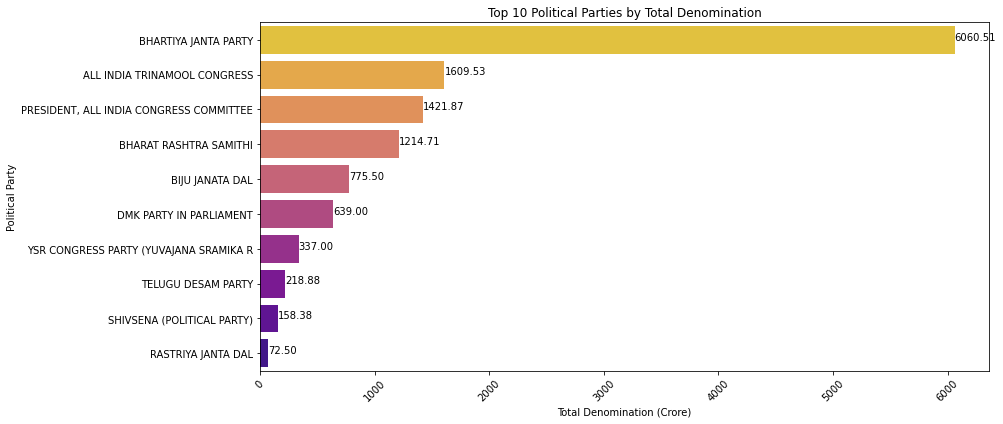

In [53]:
# Create a bar plot for the top 10 political parties
plt.figure(figsize=(14,6))
sns.barplot(x='Denomination(Crore)', y='Name of the Political Party', data=top_10_parties, palette='plasma_r')
plt.xlabel('Total Denomination (Crore)')
plt.ylabel('Political Party')
plt.title('Top 10 Political Parties by Total Denomination')
plt.xticks(rotation=45)

# Add value labels above the bars
for index, row in top_10_parties.iterrows():
    plt.text(row['Denomination(Crore)'], index, f"{row['Denomination(Crore)']:.2f}", color='black', ha="left", va="baseline")

plt.tight_layout()
plt.show()

In [54]:
# Group by 'Name of the Political Party' and 'Party_Acronym' and count the number of Bond Recived
party_count = df1.groupby(['Name of the Political Party', 'Party_Acronym']).size()

# Sort the party_count Series by count in descending order
party_count = party_count.sort_values(ascending=False)

# Reset index to make 'Name of the Political Party' and 'Party_Acronym' columns accessible for plotting
party_count = party_count.reset_index(name='Receive Count')

party_count

,Name of the Political Party,Party_Acronym,Receive Count
0,BHARTIYA JANTA PARTY,BJP,8633
1,ALL INDIA TRINAMOOL CONGRESS,AITC,3305
2,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",PAICC,3146
3,BHARAT RASHTRA SAMITHI,BRS,1806
4,BIJU JANATA DAL,BJD,861
5,DMK PARTY IN PARLIAMENT,DPIP,648
6,YSR CONGRESS PARTY (YUVAJANA SRAMIKA R,YCP(SR,472
7,SHIVSENA (POLITICAL PARTY),S(P,354
8,TELUGU DESAM PARTY,TDP,279
9,AAM AADMI PARTY,AAP,245


In [55]:
# Get the top 10 parties by count
party_count.head(10)

,Name of the Political Party,Party_Acronym,Receive Count
0,BHARTIYA JANTA PARTY,BJP,8633
1,ALL INDIA TRINAMOOL CONGRESS,AITC,3305
2,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",PAICC,3146
3,BHARAT RASHTRA SAMITHI,BRS,1806
4,BIJU JANATA DAL,BJD,861
5,DMK PARTY IN PARLIAMENT,DPIP,648
6,YSR CONGRESS PARTY (YUVAJANA SRAMIKA R,YCP(SR,472
7,SHIVSENA (POLITICAL PARTY),S(P,354
8,TELUGU DESAM PARTY,TDP,279
9,AAM AADMI PARTY,AAP,245


## Top 10 Parties by Number of Electoral Bonds Received

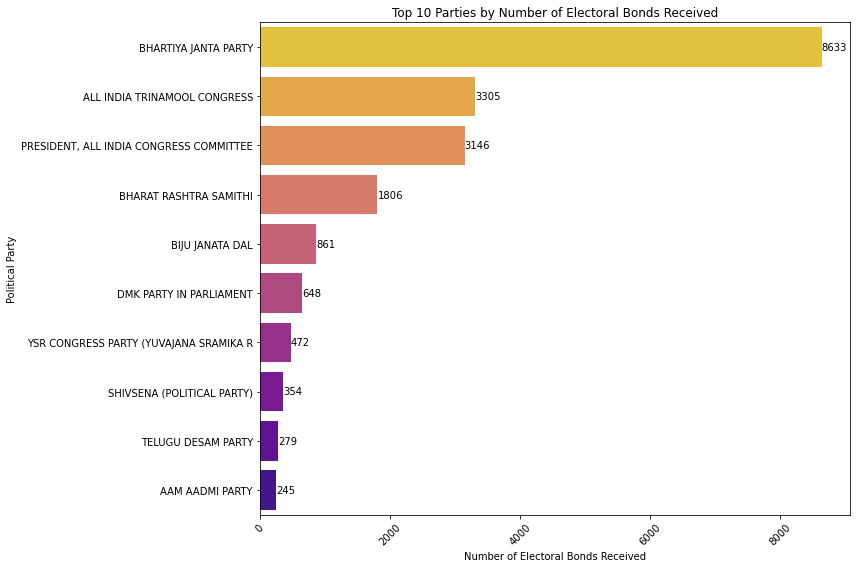

In [56]:
# Group by 'Name of the Political Party' and 'Party_Acronym' and count the number of occurrences
party_count = df1.groupby(['Name of the Political Party', 'Party_Acronym']).size()

# Get the top 10 parties by count
top_10_parties = party_count.nlargest(10)

# Reset index to make 'Name of the Political Party' and 'Party_Acronym' columns accessible for plotting
top_10_parties = top_10_parties.reset_index(name='Count')

# Create a bar plot for the count of Electoral Bonds received by the top 10 parties
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Name of the Political Party', data=top_10_parties, palette='plasma_r')
plt.xlabel('Number of Electoral Bonds Received')
plt.ylabel('Political Party')
plt.title('Top 10 Parties by Number of Electoral Bonds Received')
plt.xticks(rotation=45)

# Add value labels above the bars
for index, row in top_10_parties.iterrows():
    plt.text(row['Count'], index, str(row['Count']), color='black', ha="left", va="center")

plt.tight_layout()
plt.show()

In [57]:
# Group by 'Name of the Political Party' and 'Party_Acronym' and calculate total denomination amount
party_denomination = df1.groupby(['Name of the Political Party', 'Party_Acronym', 'Year'])['Denomination(Crore)'].sum()

# Get the top 5 political parties by total denomination amount
top_5_parties = party_denomination.groupby(['Name of the Political Party', 'Party_Acronym']).sum().nlargest(5).index.get_level_values(1)

# Filter the data to include only the top 5 parties
top_5_party_denomination = party_denomination[party_denomination.index.get_level_values(1).isin(top_5_parties)]

# Reset index to make 'Year', 'Name of the Political Party', and 'Party_Acronym' columns accessible for plotting
top_5_party_denomination = top_5_party_denomination.reset_index()
top_5_party_denomination

,Name of the Political Party,Party_Acronym,Year,Denomination(Crore)
0,ALL INDIA TRINAMOOL CONGRESS,AITC,2019,87.09
1,ALL INDIA TRINAMOOL CONGRESS,AITC,2020,29.77
2,ALL INDIA TRINAMOOL CONGRESS,AITC,2021,330.94
3,ALL INDIA TRINAMOOL CONGRESS,AITC,2022,468.80
4,ALL INDIA TRINAMOOL CONGRESS,AITC,2023,562.47
5,ALL INDIA TRINAMOOL CONGRESS,AITC,2024,130.45
6,BHARAT RASHTRA SAMITHI,BRS,2019,37.15
7,BHARAT RASHTRA SAMITHI,BRS,2021,153.00
8,BHARAT RASHTRA SAMITHI,BRS,2022,528.99
9,BHARAT RASHTRA SAMITHI,BRS,2023,495.57


## Top 5 Political Parties: Amount Received Each Year

<Figure size 864x576 with 0 Axes>

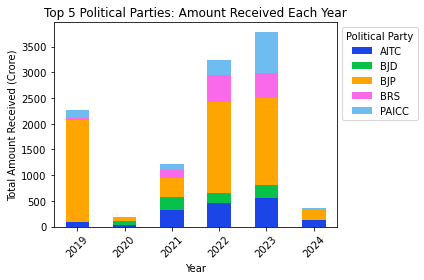

In [58]:
# Pivot the data to have 'Year' as the index, 'Name of the Political Party' as the columns, and 'Denomination(Crore)' as the values
pivot_table = top_5_party_denomination.pivot(index='Year', columns='Party_Acronym', values='Denomination(Crore)')

# Define colors for each party
party_colors = {
    'BJP': 'orange',
    'BRS': '#fa69e9',
    'AITC': '#1c45e8',
    'PAICC': '#6ebcf0',
    'BJD': '#06c24b'
}

# Create a stacked bar plot for the amount received by the top 5 parties each year
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True, color=[party_colors[col] for col in pivot_table.columns])
plt.xlabel('Year')
plt.ylabel('Total Amount Received (Crore)')
plt.title('Top 5 Political Parties: Amount Received Each Year')
plt.legend(title='Political Party', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

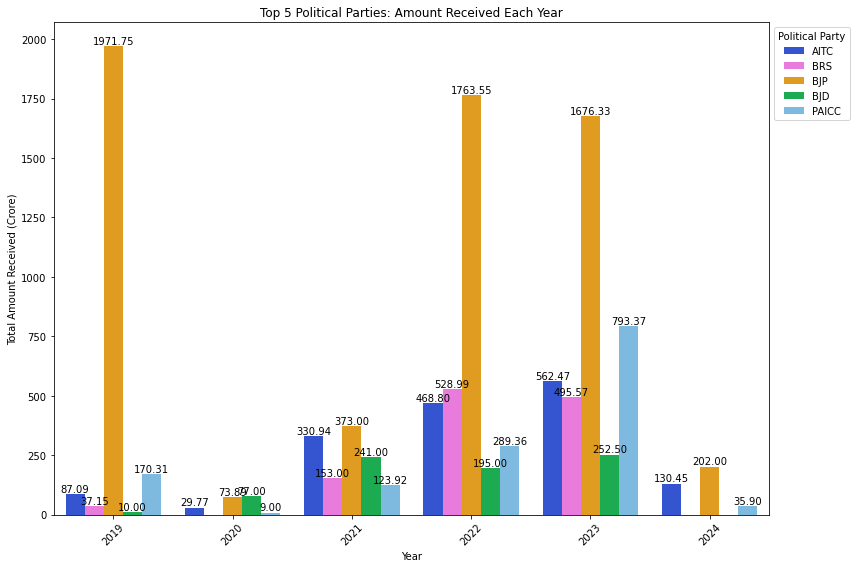

In [59]:
# Define colors for each party
party_colors = {
    'BJP': 'orange',
    'BRS': '#fa69e9',
    'AITC': '#1c45e8',
    'PAICC': '#6ebcf0',
    'BJD': '#06c24b'
}

# Create a grouped bar plot for the amount received by the top 5 parties each year
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Denomination(Crore)', hue='Party_Acronym', data=top_5_party_denomination, palette=party_colors, dodge=0.5)
plt.xlabel('Year')
plt.ylabel('Total Amount Received (Crore)')
plt.title('Top 5 Political Parties: Amount Received Each Year')
plt.legend(title='Political Party', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)

# Add value labels on the bars
for p in plt.gca().patches:
    height = p.get_height()
    if np.isfinite(height):  # Check if height is a finite number
        plt.gca().text(p.get_x() + p.get_width()/2, height + 0.05, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()